#### **Tensorflow 버전 설정**

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [2]:
!pip uninstall tensorflow
!pip install tensorflow==1.15

Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.9.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.9.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 50 kB 8.1 MB/s 
     |████████████████████████████████| 503 kB 57.9 MB/s 
     |████████████████████████████████| 3.8 MB 55.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=e9c17976adc5278ecb1a6cc7d867

#### **MNIST 학습하기**
**최적화 방법 : Gradient Descent Optimization**

**과적합 방지 : Drop Out**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [15]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

In [16]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X,W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L3 = tf.nn.relu(tf.matmul(L2,W3))
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L4 = tf.nn.relu(tf.matmul(L3,W4))
L4 = tf.nn.dropout(L4, keep_prob)

W5 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L4,W5)

In [47]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(0.9).minimize(cost)

In [48]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [49]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [64]:
for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.3f}'.format
            (total_cost / total_batch))
    
print('최적화 완료!')

Epoch: 0001 Avg. cost =  0.016
Epoch: 0002 Avg. cost =  0.019
Epoch: 0003 Avg. cost =  0.012
Epoch: 0004 Avg. cost =  0.012
Epoch: 0005 Avg. cost =  0.013
Epoch: 0006 Avg. cost =  0.010
Epoch: 0007 Avg. cost =  0.009
Epoch: 0008 Avg. cost =  0.011
Epoch: 0009 Avg. cost =  0.010
Epoch: 0010 Avg. cost =  0.009
Epoch: 0011 Avg. cost =  0.009
Epoch: 0012 Avg. cost =  0.007
Epoch: 0013 Avg. cost =  0.009
Epoch: 0014 Avg. cost =  0.008
Epoch: 0015 Avg. cost =  0.006
최적화 완료!


In [65]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: ', sess.run(accuracy, feed_dict={X: mnist.test.images, 
                                   Y: mnist.test.labels, keep_prob: 1}))

정확도:  0.9832


In [63]:
labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, 
                                    keep_prob: 1})

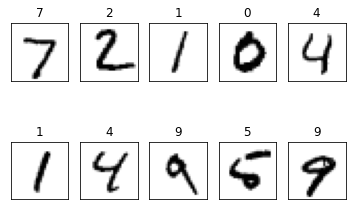

In [66]:
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(mnist.test.images[i].reshape(28, 28), cmap=plt.cm.gray_r)
plt.show()

#### **MNIST 학습하기**
**최적화 방법 : Gradient Descent Optimization**

**과적합 방지 : Batch Normalization**

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [53]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.bool)

In [55]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X,W1))
L1 = tf.layers.batch_normalization(L1,training=keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))
L2 = tf.layers.batch_normalization(L2,training=keep_prob)

W3 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L3 = tf.nn.relu(tf.matmul(L2,W3))
L3 = tf.layers.batch_normalization(L3,training=keep_prob)

W4 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L4 = tf.nn.relu(tf.matmul(L3,W4))
L4 = tf.layers.batch_normalization(L4,training=keep_prob)

W5 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L4,W5)

In [56]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(1).minimize(cost)

In [57]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [58]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [59]:
for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.3f}'.format
            (total_cost / total_batch))
    
print('최적화 완료!')

Epoch: 0001 Avg. cost =  0.381
Epoch: 0002 Avg. cost =  0.128
Epoch: 0003 Avg. cost =  0.092
Epoch: 0004 Avg. cost =  0.072
Epoch: 0005 Avg. cost =  0.060
Epoch: 0006 Avg. cost =  0.051
Epoch: 0007 Avg. cost =  0.046
Epoch: 0008 Avg. cost =  0.042
Epoch: 0009 Avg. cost =  0.035
Epoch: 0010 Avg. cost =  0.027
Epoch: 0011 Avg. cost =  0.024
Epoch: 0012 Avg. cost =  0.023
Epoch: 0013 Avg. cost =  0.021
Epoch: 0014 Avg. cost =  0.019
Epoch: 0015 Avg. cost =  0.016
최적화 완료!


In [60]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: ', sess.run(accuracy, feed_dict={X: mnist.test.images, 
                                   Y: mnist.test.labels, keep_prob: 1}))

정확도:  0.9803


In [61]:
labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, 
                                    keep_prob: 1})

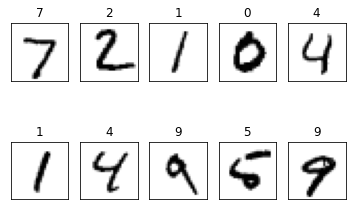

In [62]:
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(mnist.test.images[i].reshape(28, 28), cmap=plt.cm.gray_r)
plt.show()